In [4]:
import matplotlib.pyplot as plt
from preprocessing.white_balance import *

In [2]:
img_path = "data/Foot Ulcer Segmentation Challenge/validation/images/0005.png"
img = Image.open(img_path)

img_stretch = to_pil(stretch(from_pil(img)))
img_gray_world = to_pil(grey_world(from_pil(img)))
img_retinex = to_pil(retinex(from_pil(img)))
img_max_white = to_pil(max_white(from_pil(img)))
img_retinex_adjust = to_pil(retinex_adjust(retinex(from_pil(img))))

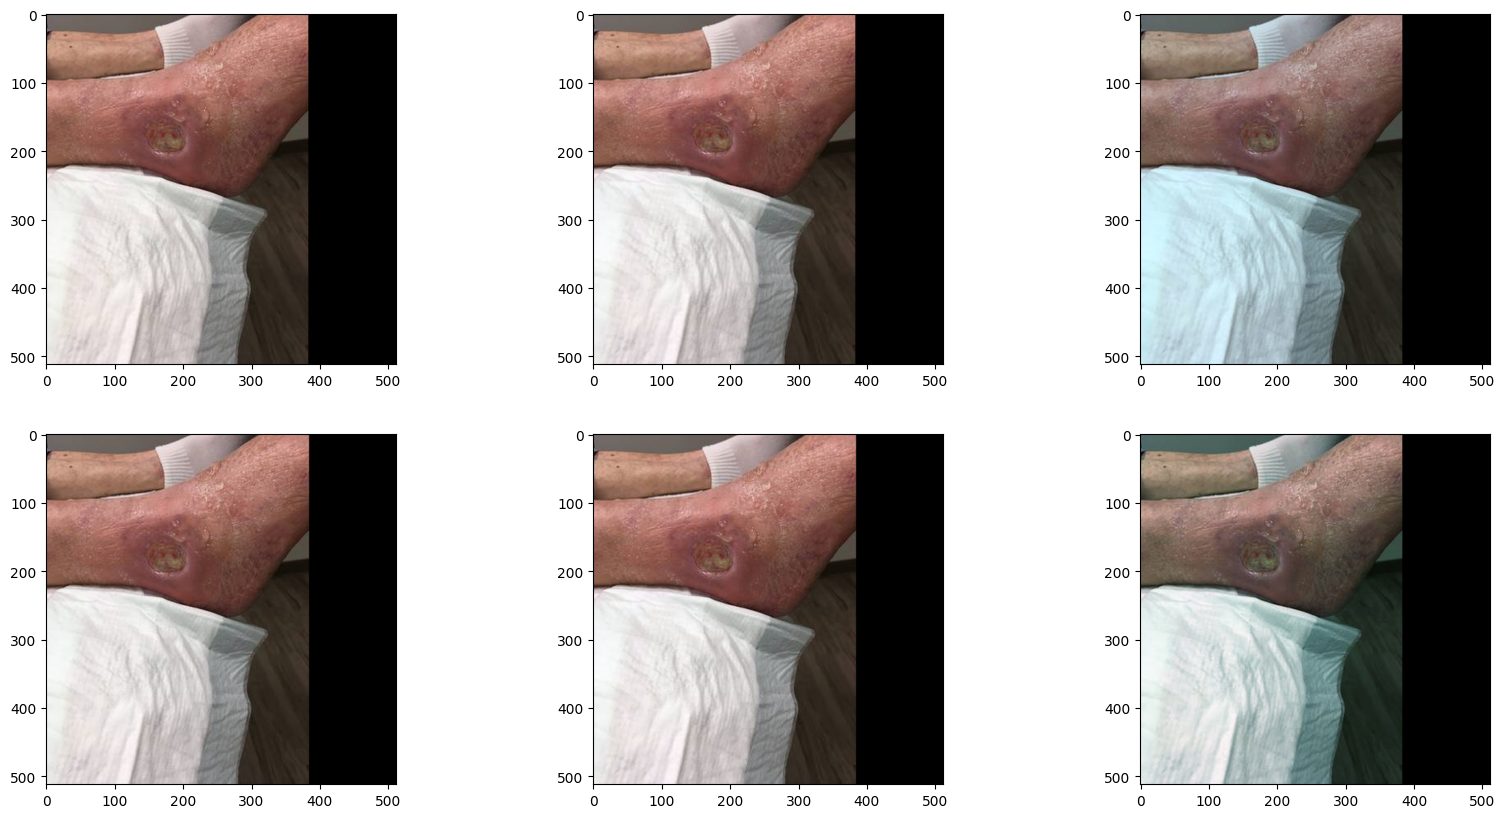

In [3]:
f, ax = plt.subplots(2,3,figsize=(20,10))
ax[0][0].imshow(img)
ax[0][1].imshow(img_stretch)
ax[0][2].imshow(img_gray_world)
ax[1][0].imshow(img_retinex)
ax[1][1].imshow(img_max_white)
ax[1][2].imshow(img_retinex_adjust)
# ax[0][0].axis('off')
plt.show()

In [4]:
from preprocessing.to_grayscale import *

(512, 512) <class 'numpy.ndarray'>
(512, 512)


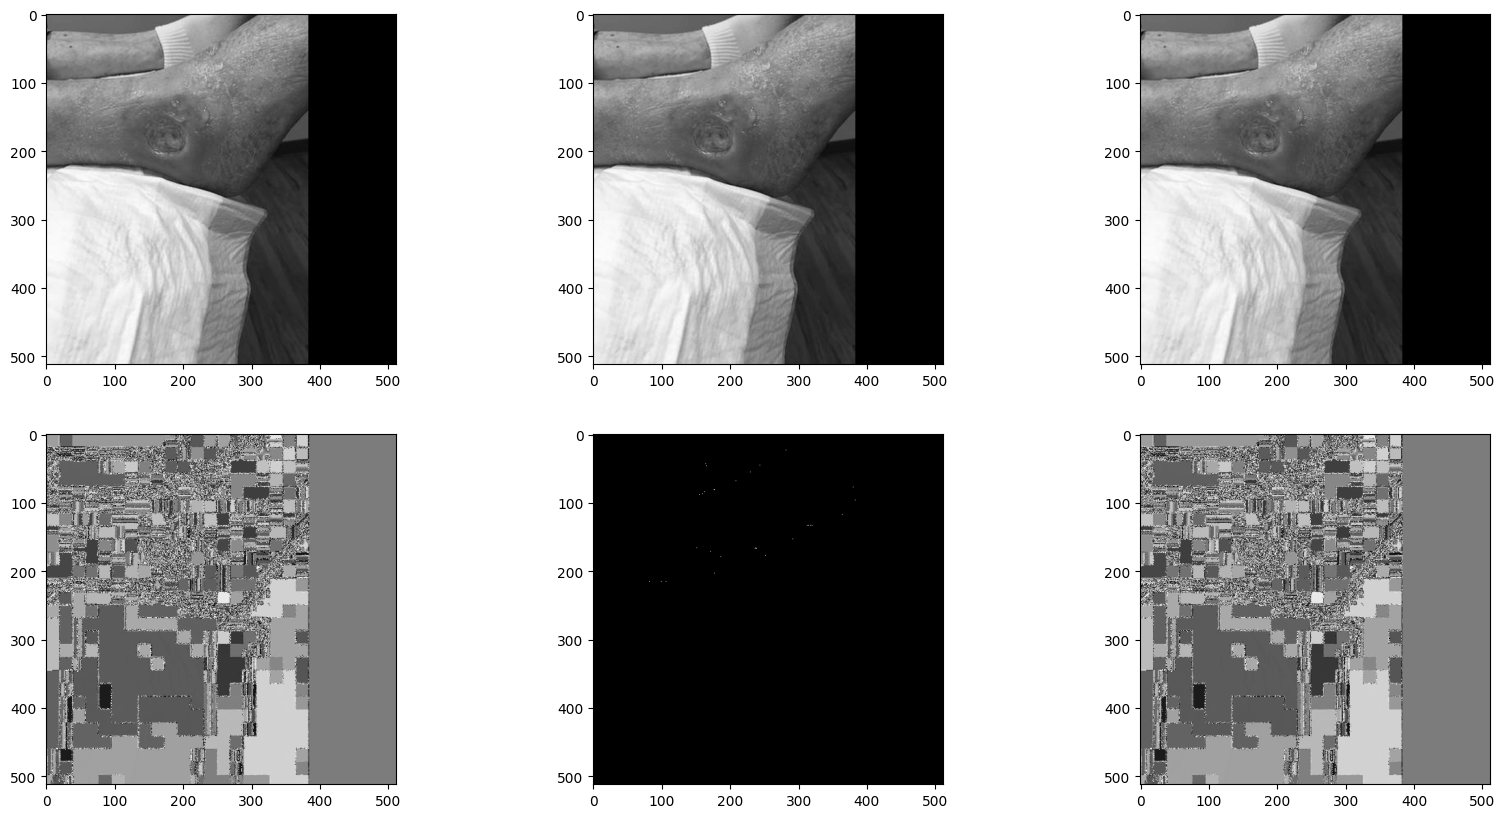

In [16]:
img_g = to_grayscale_as_y_from_yuv(img_path)

numpy_img = np.array(img)
img_g1 = to_graycale(numpy_img)
print(img_g1.shape, type(img_g1))

img_g_pillow = img.convert('L')
print(img_g_pillow.size)

f, ax = plt.subplots(2,3,figsize=(20,10))
ax[0][0].imshow(img_g, cmap='gray')
ax[0][1].imshow(img_g1, cmap='gray')
ax[0][2].imshow(img_g_pillow, cmap='gray')
ax[1][0].imshow(img_g-img_g1, cmap='gray')
ax[1][1].imshow(img_g-img_g_pillow, cmap='gray')
ax[1][2].imshow(img_g_pillow-img_g1, cmap='gray')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..253.0025].


(512, 512) <class 'numpy.ndarray'>
(512, 512, 3)
(512, 512)
Opening in existing browser session.


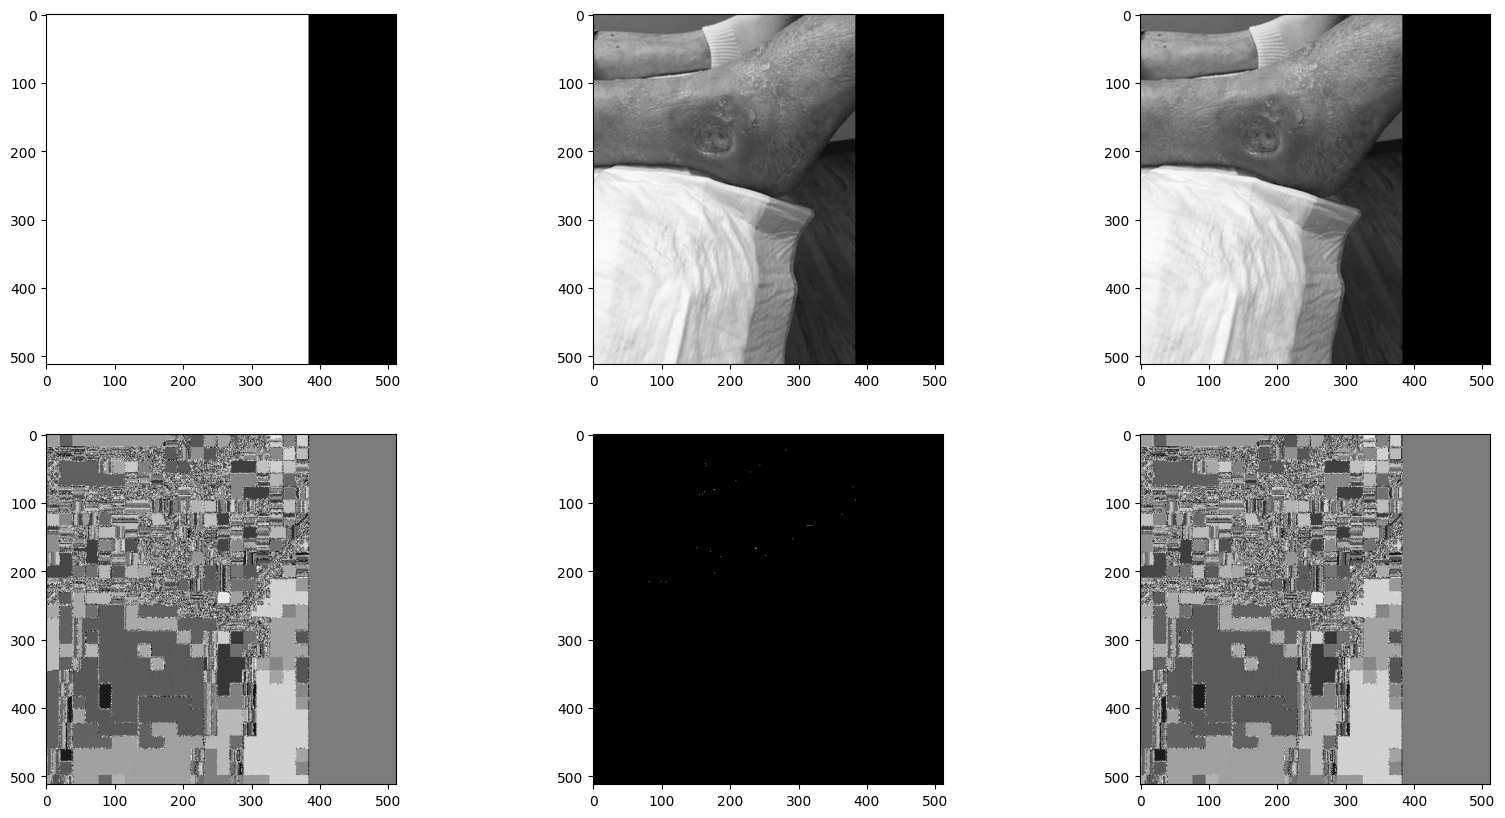

In [20]:
img_g = to_grayscale_as_y_from_yuv(img_path)

numpy_img = np.array(img)
img_g1 = to_graycale(numpy_img)
print(img_g1.shape, type(img_g1))

rgb_array = np.stack([img_g1] * 3, axis=-1)  # Shape: (H, W, 3)
print(rgb_array.shape)
three_channel_image = Image.fromarray(rgb_array, mode='RGB')

# Show the image
three_channel_image.show()

img_g_pillow = img.convert('L')
print(img_g_pillow.size)

f, ax = plt.subplots(2,3,figsize=(20,10))
ax[0][0].imshow(img_g, cmap='gray')

ax[0][0].imshow(rgb_array)

ax[0][1].imshow(img_g1, cmap='gray')
ax[0][2].imshow(img_g_pillow, cmap='gray')
ax[1][0].imshow(img_g-img_g1, cmap='gray')
ax[1][1].imshow(img_g-img_g_pillow, cmap='gray')
ax[1][2].imshow(img_g_pillow-img_g1, cmap='gray')

plt.show()

In [5]:
import numpy as np
def grey_world(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = np.average(nimg[1])
    nimg[0] = np.minimum(nimg[0]*(mu_g/np.average(nimg[0])),255)
    nimg[2] = np.minimum(nimg[2]*(mu_g/np.average(nimg[2])),255)
    return  nimg.transpose(1, 2, 0).astype(np.uint8)

In [8]:
import numpy as np

# Create a dummy RGB image of size 100x100
dummy_image = np.random.randint(0, 256, (3, 100, 100), dtype=np.uint8)

# Call the grey_world function
corrected_image = grey_world(dummy_image)
corrected_image

array([[[186, 159, 239, ...,  27, 226,  59],
        [223, 117,  91, ..., 121, 230, 123],
        [ 41, 245,  94, ..., 217, 233,  79],
        ...,
        [ 90,  88,  43, ...,   3,  38, 124],
        [ 31, 242,  33, ..., 100, 101, 174],
        [206, 177, 213, ..., 247,  35,  15]],

       [[249,  26, 218, ..., 189, 223, 106],
        [220, 196,  88, ..., 179,  21, 220],
        [225,  15, 187, ...,   5, 119, 166],
        ...,
        [  7, 178, 214, ...,  44,  71, 133],
        [139, 172, 202, ...,  68, 172, 197],
        [104,  52, 186, ...,  29, 103, 172]],

       [[112,  72, 217, ..., 110, 160,  17],
        [183, 235,  87, ..., 240, 180,  57],
        [ 92,  56,  63, ..., 171, 219, 127],
        ...,
        [186, 183, 179, ..., 128, 247,  15],
        [105, 148,  70, ...,  56, 157, 180],
        [ 47, 200, 229, ...,  64,  17, 105]]], dtype=uint8)